<a href="https://colab.research.google.com/github/Lustiyana/PrakPembelajaranMesin/blob/main/Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from math import sqrt
from google.colab import files

In [15]:
f = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2 (2).csv


In [16]:
f

{'FuelConsumptionCo2.csv': b'MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS\r2014,ACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196\r2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221\r2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48,136\r2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255\r2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244\r2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10,28,230\r2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232\r2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9,11.1,25,255\r2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267\r2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212\r2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225\r2014,ACURA,TSX,COMPACT,3.5,6,AS5,Z,12.1,8.3,10.4,27,239\r2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18,12.6,15.6,18,359\r2014,ASTON MARTIN,RAPIDE,SUB

In [17]:
df = pd.read_csv(io.StringIO(f['FuelConsumptionCo2.csv'].decode('utf-8')))
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
df.shape

(1067, 13)

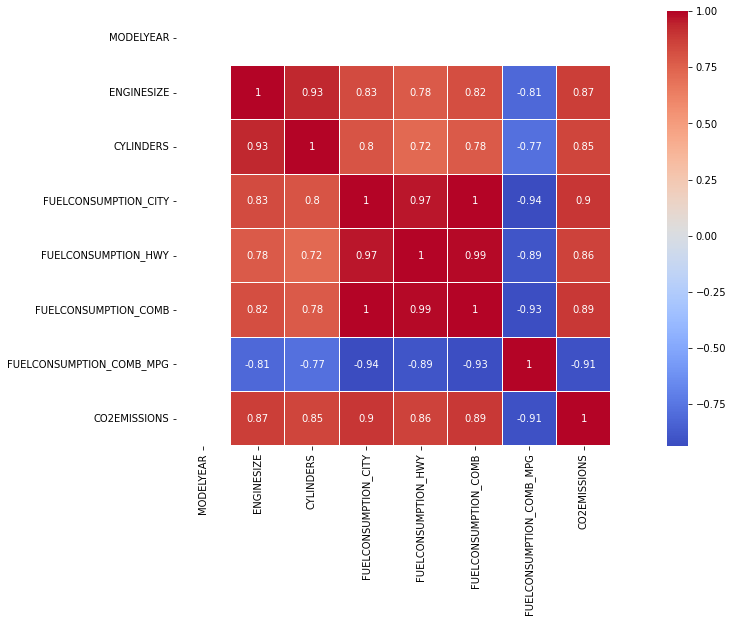

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True)

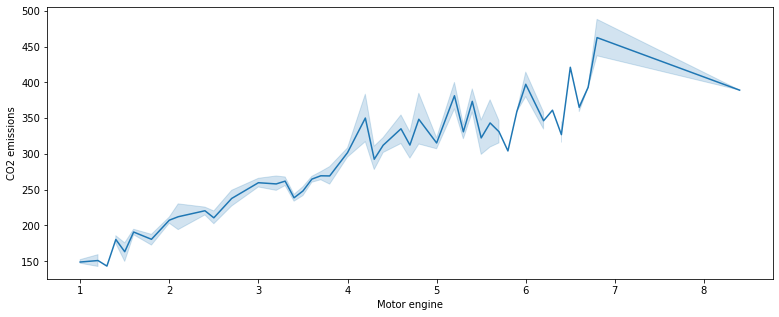

In [21]:
plt.figure(figsize=(13,5))
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])
plt.xlabel('Motor engine')
plt.ylabel('CO2 emissions')
plt.show()

In [22]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [23]:
engine= df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

In [24]:
engine_treino, engine_test, co2_treino, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

In [25]:
print(type(engine_treino))

<class 'pandas.core.frame.DataFrame'>


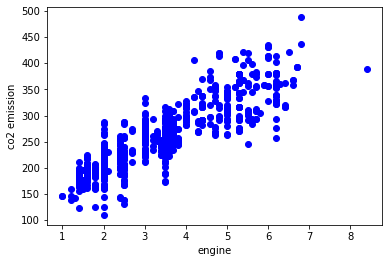

In [26]:
plt.scatter(engine_treino, co2_treino, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

In [27]:
modelo = linear_model.LinearRegression()

In [28]:
modelo.fit(engine_treino, co2_treino)

LinearRegression()

In [29]:
print(f'(A) intercept: {modelo.intercept_} | (B) inclination: {modelo.coef_}')

(A) intercept: [126.28970217] | (B) inclination: [[38.99297872]]


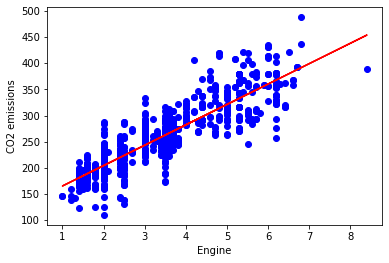

In [30]:
plt.scatter(engine_treino, co2_treino, color='blue')
plt.plot(engine_treino, modelo.coef_[0][0]*engine_treino + modelo.intercept_[0], '-r') 
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

In [31]:
predictCO2 = modelo.predict(engine_test)

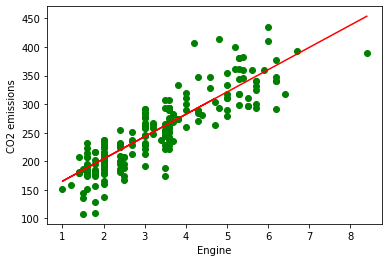

In [32]:
plt.scatter(engine_test, co2_test, color='green')
plt.plot(engine_test, modelo.coef_[0][0]*engine_test + modelo.intercept_[0], '-r')
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

In [33]:
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - co2_test)**2)}') 
print(f'Mean squared error (MSE): {mean_squared_error(co2_test, predictCO2)}')
print(f'Mean absolute error (MAE): {mean_absolute_error(co2_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(co2_test, predictCO2))}')
print(f'R2-score: {r2_score(predictCO2, co2_test)}')

Sum of squared error (SSE): CO2EMISSIONS    210990.768215
dtype: float64
Mean squared error (MSE): 985.9381692274999
Mean absolute error (MAE): 24.09725741170784
Sqrt of mean squared error (RMSE):  31.399652374309813
R2-score: 0.6782015355440534
